# Alessandro Pomponio - 0000920265

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Variables
file_name = 'online_retail_red.txt'
separator = ';'
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

## 1. Read a transactions database in sparse format from a txt file into a list of lists. The file contains one transaction per line, each line has a variable number of items, separated by a separator. The external list will have a list for each transaction, each transaction is a list of items. Show the first two transactions (3 points)

We start by reading the database from the text file into a list of lists

In [2]:
# Open the file
file = open(file_name, mode = 'r')

# The transactions are separated by a ';'
# We must also strip the '\n' at the end of the transaction
transactions = [line.strip('\n').split(separator) for line in file.readlines()]

Showing the first two transactions:

In [3]:
print(f"First transaction:\t{transactions[0]}\n\nSecond transaction:\t{transactions[1]}")

First transaction:	['CREAM CUPID HEARTS COAT HANGER', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']

Second transaction:	['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK']


## 2. Encode the list of lists into a binary representation and transform it into a dataframe whose columns are the items show the head of that dataframe

To perform this task, we will use a transaction encoder to transform the data in a binary representation

In [4]:
# Encode the transactions
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Put the data in a dataframe
df = pd.DataFrame(encoded_transactions.astype(int), columns = encoder.columns_)
df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below (5 points)

_min_support: 0.xxxx - number of itemsets with at least 2 items: nn_

In order to perform the task, we will specify a range of "reasonable" `min_support` values and iterate until we meet our criteria

In [5]:
# Requirements
min_itemsets = 8
min_item_in_itemset = 2

# "Reasonable" range
support_range = np.arange(0.1, 0.01, -0.01)

In [6]:
min_support = 0

for s_value in support_range:

    print(f"Trying support value {s_value:.2f}")

    frequent_itemsets = apriori(df, min_support = s_value, use_colnames = True)

    # Calculate the number of itemsets that contain at least `min_item_in_itemset` items
    itemsets_above_threshold = sum([len(itemset) >= min_item_in_itemset for itemset in frequent_itemsets.itemsets])
    
    if itemsets_above_threshold >= min_itemsets:
        min_support = s_value
        break

if min_support == 0:
    print("No itemset found! Try again with a bigger range!")
else:
    print(f"I've selected min_support = {min_support:.2f}, which produced {len(frequent_itemsets)} itemsets, {itemsets_above_threshold} of which had more than {min_item_in_itemset} items")

Trying support value 0.10


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.09


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.08


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.07


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.06


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.05


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.04


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trying support value 0.03


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 1.22 GiB for an array with shape (9180, 2, 17874) and data type int32

Output as requested

In [ ]:
print(f"min_support: {min_support:.4f} - number of itemsets with at least 2 items: {itemsets_above_threshold}")

min_support: 0.0300 - number of itemsets with at least 2 items: 12


## 4. Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

_use "confidence" as metric and output the line below:_

_Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n_

Just like we did before, let us create a "reasonable" range to iterate over

In [ ]:
# Threshold
min_rules = 10

# "Reasonable" range
confidence_range = np.arange(1, 0.01, -0.01)

In [ ]:
min_confidence = 0

for c_value in confidence_range:

    print(f"Trying confidence value {c_value:.2f}")
    rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = c_value)
  
    if len(rules) >= min_rules:
        min_confidence = c_value
        break

if min_confidence == 0:
    print("No rule set met the requirements! Try again with a bigger range!")
else:
    print(f"I've selected min_confidence = {min_confidence:.2f}, which produced {len(rules)} rules")

Trying confidence value 1.00
Trying confidence value 0.99
Trying confidence value 0.98
Trying confidence value 0.97
Trying confidence value 0.96
Trying confidence value 0.95
Trying confidence value 0.94
Trying confidence value 0.93
Trying confidence value 0.92
Trying confidence value 0.91
Trying confidence value 0.90
Trying confidence value 0.89
Trying confidence value 0.88
Trying confidence value 0.87
Trying confidence value 0.86
Trying confidence value 0.85
Trying confidence value 0.84
Trying confidence value 0.83
Trying confidence value 0.82
Trying confidence value 0.81
Trying confidence value 0.80
Trying confidence value 0.79
Trying confidence value 0.78
Trying confidence value 0.77
Trying confidence value 0.76
Trying confidence value 0.75
Trying confidence value 0.74
Trying confidence value 0.73
Trying confidence value 0.72
Trying confidence value 0.71
Trying confidence value 0.70
Trying confidence value 0.69
Trying confidence value 0.68
Trying confidence value 0.67
Trying confide

Print out as required:

In [ ]:
print(f'Metric: "confidence" - min_metric: {min_confidence:.4f} - Number of rules: {len(rules)}')

Metric: "confidence" - min_metric: 0.6100 - Number of rules: 11


## 5. Print the first 10 rules found, sorted by descending confidence and support (3 points)

We now know that there are 11 rules, so we can just limit the output.

It is important to drop the index when sorting the rules so that a new one can be built

In [ ]:
sorted_rules = rules.sort_values(by = ['confidence', 'support'], ascending = False).reset_index(drop=True)
sorted_rules[:-1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039331,0.052255,0.032282,0.820768,15.707077,0.030226,5.287817
1,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039331,0.053541,0.030547,0.776671,14.505982,0.028441,4.237964
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.052255,0.053541,0.039219,0.750535,14.017835,0.036421,3.793958
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053541,0.052255,0.039219,0.732497,14.017835,0.036421,3.542939
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041960,0.050241,0.030267,0.721333,14.357586,0.028159,3.408228
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064843,0.108426,0.043919,0.677308,6.246751,0.036888,2.762927
6,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044758,0.062941,0.030100,0.672500,10.684680,0.027283,2.861250
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049010,0.052031,0.031498,0.642694,12.352165,0.028948,2.653102
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050912,0.108426,0.031890,0.626374,5.776988,0.026370,2.386273
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052255,0.039331,0.032282,0.617773,15.707077,0.030226,2.513347


## 6. Plot confidence and support for all the sorted rules found (3 points)

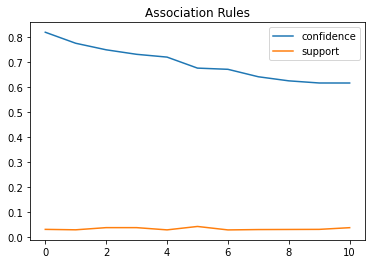

In [ ]:
sorted_rules[['confidence','support']].plot(title='Association Rules');

## 7. Scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (3 points)

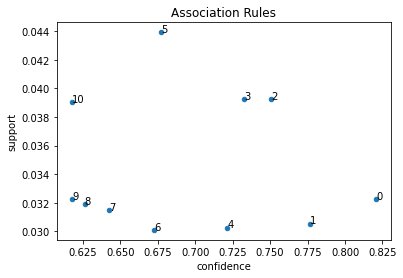

In [ ]:
# Create a scatter plot of the sorted rules
fig = sorted_rules.plot.scatter(x = 'confidence', y = 'support', title = 'Association Rules');

# Iterate over all the rules and annotate them with their index
for i in range(len(sorted_rules)):
    fig.annotate(text = i, xy = (sorted_rules['confidence'][i], sorted_rules['support'][i]))
                        